In [1]:
using Luxor, LightXML

In [2]:
pointradius = 6
linewidth = 2;

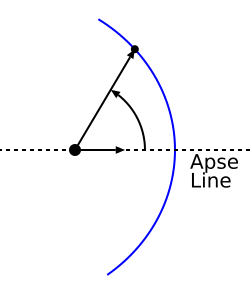

In [3]:
drawing_height = 300
drawing_width = 250
Drawing(drawing_width, drawing_height, :svg)
# box(O, Point(drawing_width, drawing_height), :stroke)
bbox = BoundingBox(;centered=false)
origin(0, drawing_height/2)

setcolor("black")
f1 = Point(-75, 0)
f2 = Point(75, 0)
circle(f2, pointradius, :fill)
epoly = ellipse(f1, f2, 350, vertices=true)
elliptical_arc = vcat(epoly[170:200], epoly[1:30])
setcolor("blue")
poly(elliptical_arc, :stroke)

setcolor("black")
m2 = elliptical_arc[10]
circle(m2, pointradius/1.5, :fill)
arrow(f2, m2, linewidth=2)
slopeofr = slope(f2, m2)

setdash("dash")
pt1, pt2 = rule(O, boundingbox=bbox)

setdash("solid")
periapsis = intersectlinepoly(pt1, pt2, elliptical_arc)[1]
d1 = distance(f2, between(f2, periapsis, 0.7))
arrow(f2, d1, 0, slopeofr, linewidth=2, clockwise=false)

arrow(f2, f2 + Point(50, 0), linewidth=2)
fontface("Dejavu Sans")
fontsize(20)
textwrap("Apse Line", 100, periapsis + Point(15, 0))

top_left_corner = getworldposition(Point(0, 0), centered=false)
finish()
preview()

In [116]:
function textlabel!(parent, txt::AbstractString, pos::Point; xoffset::Number=0, yoffset::Number=0)
    x = pos.x + xoffset + top_left_corner.x
    y = pos.y + yoffset + top_left_corner.y
    elem = new_child(parent, "text")
    add_text(elem, txt)
    set_attributes(elem, Dict("class"=>"math", "x"=>string(x, "pt"), "y"=>string(y, "pt")))
    return nothing
end;

In [117]:
svg_out = svgstring();
xdoc = parse_string(svg_out)
xroot = root(xdoc);

In [118]:
textlabel!(xroot, "\\boldsymbol{r}", between(f2, m2, 0.4), xoffset=-25, yoffset=-45)
textlabel!(xroot, "\\text{Path of } m_2", elliptical_arc[end], xoffset=-70, yoffset=-100)
textlabel!(xroot, "m_1", f2, xoffset=-30, yoffset=-30)
textlabel!(xroot, "m_2", m2, xoffset=-30, yoffset=-25)
textlabel!(xroot, "\\nu", between(f2, elliptical_arc[30], 0.85), xoffset=-50, yoffset=-50)
textlabel!(xroot, "\\boldsymbol{e}", f2 + Point(25, 0), xoffset=-25, yoffset=-30)


In [119]:
save_file(xdoc, "../raw_svg/apse-line.svg");